In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import scanpy as sc
import muon as mu
import anndata
import mudata
import pandas as pd

In [33]:
adata = sc.read("data/human_pancreas_norm_complexBatch.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [34]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [5]:
sc.tl.pca(adata, svd_solver='arpack')

In [6]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [7]:
sc.tl.umap(adata)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


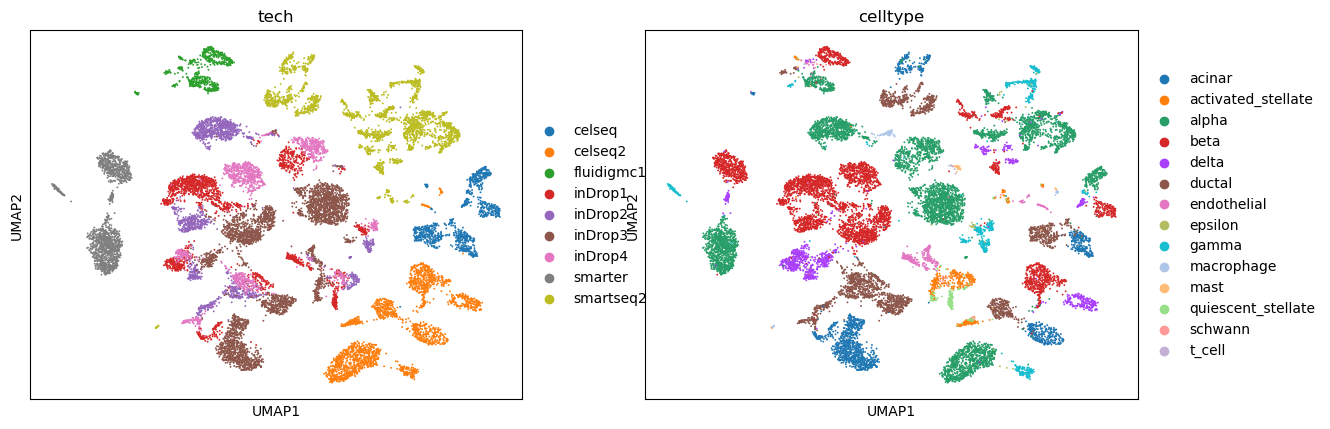

In [10]:
sc.pl.umap(adata, color=['tech', 'celltype'])

In [24]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="pancreas")

In [25]:
from src.vae.model import VAE, ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = VAE(adata, model_params)

In [26]:
from src.vae.train import train_vae
hist = train_vae(model, adata, batch_keys=["tech"], params=train_params)

100%|█████████████████████████████████████████| 103/103 [01:02<00:00,  1.66it/s]

EarlyStopping (epoch: 1): train loss improved to 0.04821150545762814



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 1): valid loss improved to 5.9002251991858845



100%|█████████████████████████████████████████| 103/103 [01:01<00:00,  1.67it/s]

EarlyStopping (epoch: 2): train loss improved to 0.03298543408279972



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 2): valid loss improved to 4.2762267131071825



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 3): valid loss improved to 3.5727028296544003



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 4): valid loss improved to 3.2020425979907694



100%|█████████████████████████████████████████| 103/103 [01:01<00:00,  1.67it/s]

EarlyStopping (epoch: 5): train loss improved to 0.02289675878505132



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 5): valid loss improved to 3.011117907670828



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.83it/s]

EarlyStopping (epoch: 6): valid loss improved to 2.881035382931049



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 7): valid loss improved to 2.7663658673946676



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.84it/s]

EarlyStopping (epoch: 8): valid loss improved to 2.7502000606977024



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.82it/s]

EarlyStopping (epoch: 9): valid loss improved to 2.7062247670613804



100%|█████████████████████████████████████████| 103/103 [01:02<00:00,  1.65it/s]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.020937407849081505. Stopping.



100%|█████████████████████████████████████████| 103/103 [01:02<00:00,  1.65it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.02089567848490832. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:14<00:00,  1.81it/s]

EarlyStopping (epoch: 16): valid loss improved to 2.6944227035229025



 35%|██████████████▋                           | 36/103 [00:23<00:44,  1.51it/s]


KeyboardInterrupt: 

100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 25.39it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


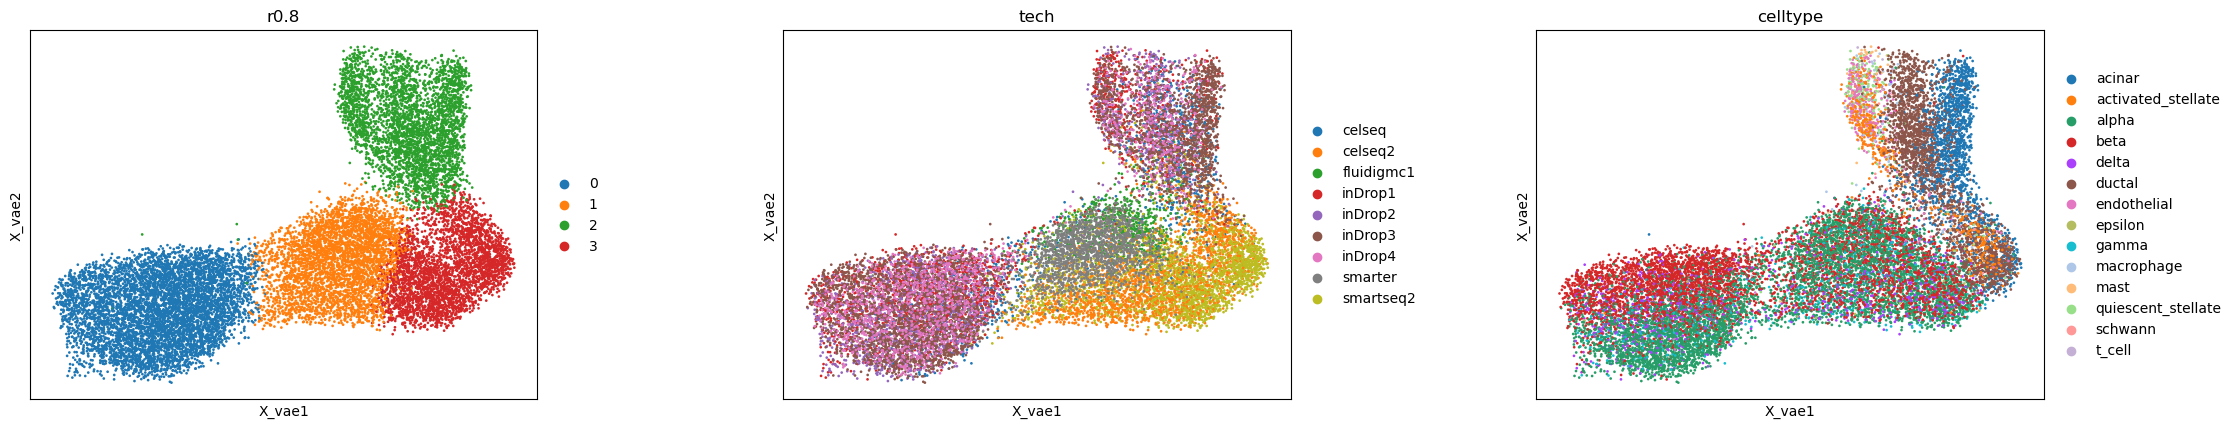

In [27]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tech", "celltype"], batch_keys=["tech"], train_params=train_params)

No normalization:

In [28]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="pancreas_unnorm")

In [29]:
from src.vae.model import VAE, ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = VAE(adata, model_params)

In [30]:
from src.vae.train import train_vae
hist = train_vae(model, adata, batch_keys=["tech"], params=train_params)

100%|█████████████████████████████████████████| 103/103 [00:53<00:00,  1.92it/s]

EarlyStopping (epoch: 1): train loss improved to 0.04763836487701311



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 1): valid loss improved to 6.175202112931472



100%|█████████████████████████████████████████| 103/103 [00:53<00:00,  1.91it/s]

EarlyStopping (epoch: 2): train loss improved to 0.032510062493881345



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 2): valid loss improved to 4.7817050860478325



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 3): valid loss improved to 3.8203152418136597



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.04it/s]

EarlyStopping (epoch: 4): valid loss improved to 3.197376462129446



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.07it/s]

EarlyStopping (epoch: 5): valid loss improved to 2.8896646316234884



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 6): train loss improved to 0.02199499678948325



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.06it/s]

EarlyStopping (epoch: 6): valid loss improved to 2.7652464371461134



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 7): valid loss improved to 2.7156796638782206



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 8): valid loss improved to 2.6843130863629856



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 10): valid loss improved to 2.661188244819641



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.01it/s]

EarlyStopping (epoch: 11): valid loss improved to 2.6410519159757175



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.01it/s]

EarlyStopping (epoch: 13): valid loss improved to 2.6202718432133016



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.020816865143817784. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.02074820661490221. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 17): valid loss improved to 2.6087143604572



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.020682523397033064. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.03it/s]

EarlyStopping (epoch: 18): valid loss improved to 2.587272020486685



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.02062844118513437. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:53<00:00,  1.91it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.020599536102539433. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.020492040296858024. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 21): valid loss improved to 2.5687391941363993



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.020436216264860814. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.90it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.02044752500112709. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.020406474834268943. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.020462045356636965. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.020385135689203814. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.02it/s]

EarlyStopping (epoch: 26): valid loss improved to 2.5585640577169566



100%|█████████████████████████████████████████| 103/103 [00:55<00:00,  1.87it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.020355878882351745. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.020302363180650276. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.020281091394973867. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.020239687111485966. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.00it/s]

EarlyStopping (epoch: 30): valid loss improved to 2.543722473658048



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 31): train loss hasn't improved: 0.020240558553678942. Stopping.



100%|███████████████████████████████████████████| 26/26 [00:12<00:00,  2.05it/s]

EarlyStopping (epoch: 31): valid loss improved to 2.5330972854907694



100%|█████████████████████████████████████████| 103/103 [00:55<00:00,  1.87it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.020217590703167383. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.87it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.020253148255390048. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.02021807685511479. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.88it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.02017397844168304. Stopping.



100%|█████████████████████████████████████████| 103/103 [00:54<00:00,  1.89it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.02016931857284086. Stopping.



 19%|████████▏                                 | 20/103 [00:12<00:52,  1.60it/s]


KeyboardInterrupt: 

100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.65it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


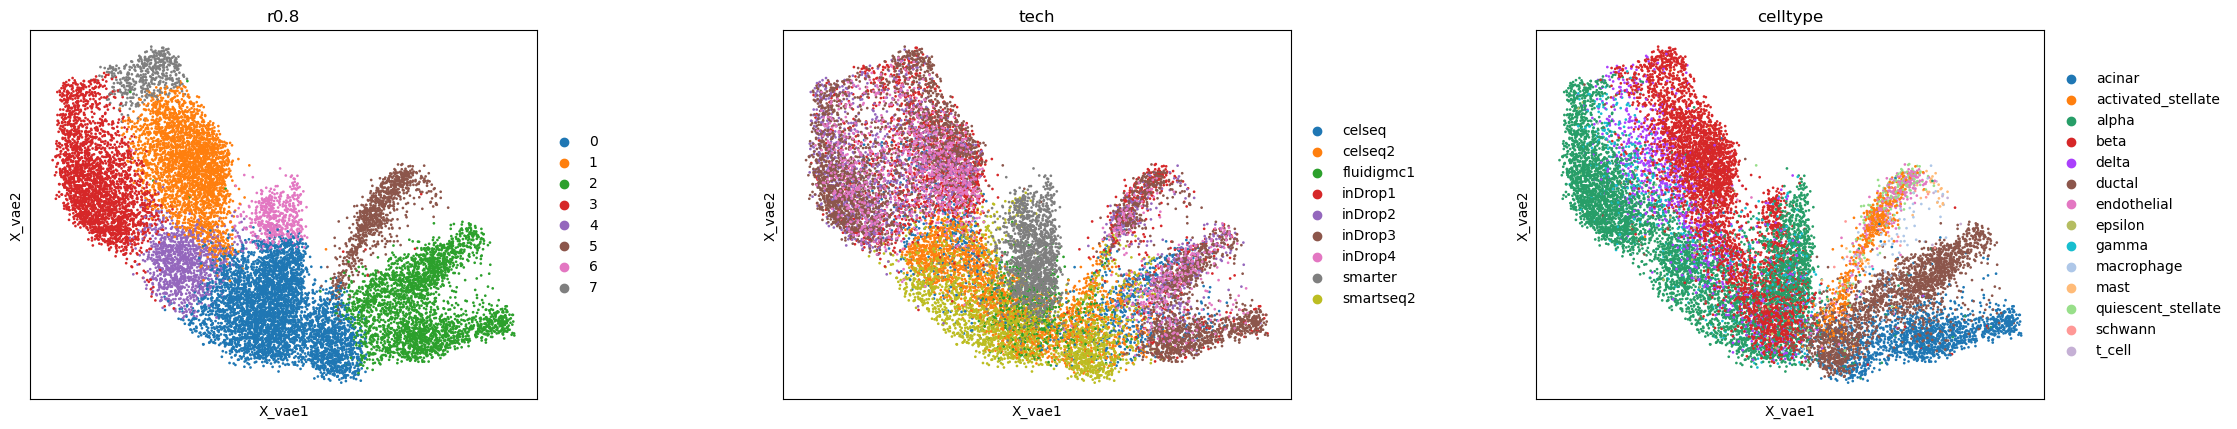

In [31]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tech", "celltype"], batch_keys=["tech"], train_params=train_params)

private * batch_integration

In [32]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="pancreas_unnorm_mult")

In [39]:
from src.vae.model import VAE, ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)
model = VAE(adata, model_params)

In [40]:
from src.vae.train import train_vae
hist = train_vae(model, adata, batch_keys=["tech"], params=train_params)

100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.64it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


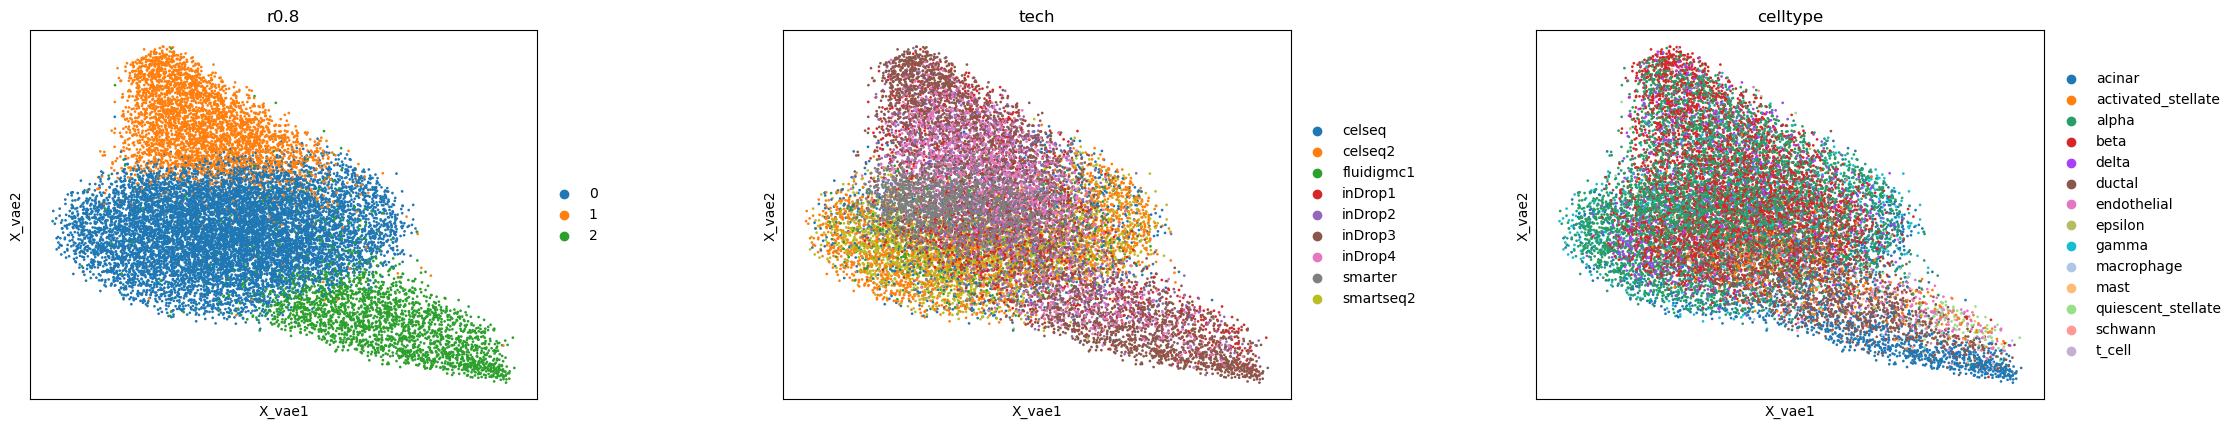

In [43]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tech", "celltype"], batch_keys=["tech"], train_params=train_params)